## Training and Evaluating a Microexons Convolutional Nerural Network

### Imports  and Installs

In [37]:
#!conda install -c bioconda pybedtools -y 
#!conda install -c bioconda pybigwig -y 


Solving environment: | 
  - anaconda/linux-64::certifi-2019.11.28-py27_0, anaconda/linux-64::conda-4.8.2-py27_0
  - anaconda/linux-64::conda-4.8.2-py27_0, defaults/linux-64::certifi-2019.11.28-py27_0
  - anaconda/linux-64::certifi-2019.11.28-py27_0, defaults/linux-64::conda-4.8.2-py27_0
  - defaults/linux-64::certifi-2019.11.28-py27_0, defaults/linux-64::conda-4.8.2-py27done

## Package Plan ##

  environment location: /root/miniconda2

  added / updated specs:
    - pybigwig


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pybigwig-0.3.17            |   py27hc013797_0          77 KB  bioconda
    ------------------------------------------------------------
                                           Total:          77 KB

The following NEW packages will be INSTALLED:

  pybigwig           bioconda/linux-64::pybigwig-0.3.17-py27hc013797_0



pybigwig-0.3.17      | 77 KB     | ###########

In [1]:
#!pip uninstall keras -y 
#!pip install keras==1.2.2
#!pip install tensorflow-gpu==1.1.0
#!pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.10.0-py3-none-any.whl 

In [2]:
#!conda install -c conda-forge matplotlib -y 
#!conda install -c anaconda scikit-learn -y
#!conda install -c anaconda seaborn -y 
#!conda install -c conda-forge tqdm -y 
#!conda install -c bcbio pybedtools -y

In [1]:

# !pip uninstall Keras -y 
# !pip install Keras==2.0.0

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Processing /root/.cache/pip/wheels/b0/a1/f4/f5f6a53dd71728cae0176b860f8c4304dd5d3fc2b8387ef59c/Keras-2.0.0-cp27-none-any.whl


In [3]:


#!conda install -c anaconda tensorflow==1.15.0 -y 

#!pip install google
#!pip install protobuf

#!pip install tensorflow-gpu

In [2]:
# %%writefile teste_model.py
# from keras.models import load_model
# model_merged = load_model('Merged_100_filters_conservation_all_strands_merged_model_first_test-40-0.71.hdf5')
# print 'model working'

In [3]:
# v = !pip install Keras==2.0.02123
# for x in [v_x.lstrip(' ').replace(')', '') for v_x in v[1].split('from versions:')[1].split(',')]:
    
#     cmd = 'pip uninstall Keras -y ;pip install Keras=={}'.format(x)
#     print (cmd)
#     print '--'*20
#     !$cmd
#     !python teste_model.py 

In [4]:
#!conda install -c anaconda tensorflow -y 


In [4]:
%matplotlib inline
import sys
import pandas as pd
from sklearn.metrics import roc_curve, auc
from IPython.display import Image
import pandas as pd
from collections import Counter
import matplotlib.image as image
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
#from keras.layers.merge import Dot
from keras.optimizers import SGD
from keras.layers import Convolution1D, MaxPooling1D
#from keras.layers.merge import Concatenate
from keras import regularizers
from random import sample
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
#import keras.backend as K
from tqdm import tqdm
from glob import glob
import subprocess
#from pybedtools import BedTool
import pickle
from keras import callbacks
import os
import re
from extract_conservation import  get_conservation_hash
import pickle
from numpy.random import seed
#from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers import Input, Add, Dot, Dropout, concatenate
from keras.layers import Dense
#from keras.layers import Flatten
from keras.layers.core import  Flatten
from keras.constraints import max_norm
from keras import regularizers
from keras.layers import BatchNormalization
from keras.callbacks import TensorBoard
from time import time
from keras.models import load_model
from keras.regularizers import l2




seed(1)

Using TensorFlow backend.


In [5]:
SIZE_SEQUENCE = 100

In [6]:
def generate_results(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.show()
    print('AUC: %f' % roc_auc)

In [7]:
base_encode = {
    'A': [0, 0, 0, 1],
    'C': [0, 0, 1, 0],
    'T': [0, 1, 0, 0],
    'G': [1, 0, 0, 0]
}

In [8]:
def encode_sequences(up_down):
    #print  up_down['up_seq'] , up_down['down_seq']
    if type(up_down['up_seq']) == str and  type(up_down['down_seq']) == str:
        up_down = (up_down['up_seq'] + up_down['down_seq']).upper()
        # if len(up_down) != 200:
        #     print 'menor que 200 cuidado'
        out_array = []
        for n in up_down:    #removendo os nucleotideos indefinidos
            if n == 'N':
                n = ''.join(sample(base_encode.keys(), 1))
            out_array.append(base_encode[n])
        for o in out_array:
            if len(o)!= 4 :

                'erro', exit()
        return out_array
    else:
        return 0

In [9]:
def create_groups(df, size = 100000):
    print df.shape
    print size
    print df.head()

    size = int(size)
    treinamento = pd.concat(
            [
                        df[df['type']== 0].sample(size, random_state=1),
                        df[df['type']== 1].sample(size, random_state=1)

            ]
            )

    
    print ('All samples length', treinamento.shape)
    teste_size = int(round(size * 0.1))
    print ('teste length', teste_size)
    teste_final= pd.concat([treinamento[treinamento['type'] == 0].sample(teste_size, random_state=1),
                                  treinamento[treinamento['type'] == 1].sample(teste_size, random_state=1)])

    treinamento = treinamento.drop(teste_final.index)

    treinamento = treinamento.sample(frac=1, random_state=1)
    
    print ('teste length', treinamento.shape)
    
    
    return (treinamento['seq_encoded'],
           treinamento['type'],
           treinamento['conservation'],
           teste_final['seq_encoded'],
           teste_final['type'],
           teste_final['conservation'],
           [treinamento['short_id'], treinamento['exon_size']],
           [teste_final['short_id'], teste_final['exon_size']])


In [10]:
def set_class(x):
    ## Creating  groups (microexons <=39)
    result = int(x['end']) - int(x['start'])
    if result <= 39:
        return 1
    elif result > 39 and result <10000:
        return 0
    else:
        return 2

In [11]:
def sequence_cg(sequence):
    return float(len([c for c in sequence if 'C' in c or  'G' in c ]))/ len(sequence)

### Processing Files

The input table contains all human exons  upstream and dowstream flanking regions DNA sequences.
The file  __bed_sem_processed_lucas_megs_and_nmes_100_minus_add.bed__ was generated using the GTF Human reference __Homo_sapiens.GRCh38.76.gtf__ .

In [12]:
df = pd.read_csv('bed_sem_processed_lucas_megs_and_nmes_100_minus_add.bed', sep='\t')
df.head()


,chr,start,end,up_seq,down_seq
0,19,48796936,48797022,TGTCCGGGGTCCCTAAGACCCTACCCCCTTCCCCCACCGAGAATTC...,ACTCCTGTACCGTAGAAGACCACTACCCGCGGTACACGGTCCCCGG...
1,15,36950323,36950400,GGTATCTGATTTCTTTAGTGGTTGCCACCAAAATAAGAATCTTCAT...,ACTCACTGGGTTTTTAGTTACAGAAAGAGGGTACCGATTTTACTCT...
2,19,49711808,49711961,cagggatgtggcaaactcagttgaggccagatgtgCCGCAGGCCCA...,TTGGGGCACAGGGAAAGGGTTAGAGAGGGAAGTGGGAGACCATGGA...
3,X,119545462,119545504,TTTGAAAACTTTCCCGGAGAATCGCAAACTTCTTTACCCTATCATT...,ATTCATAATTGTTACACCCAAAGAGGTTCGTATCCGTTCATCTCCG...
4,15,28212444,28212583,ACACCGTAAAGTCCTAATTCGGGTACCAAAACTACTGAAAGTCTTG...,AGTCATGTACCACGAAGAACTACTTTATCGACGGCAGAATTTGAGC...


In [13]:
df = df.drop_duplicates()
print 'Total Number of exons WITHOUT duplicates:', df.shape[0]
print 'Setting the Micro-Exon classes...'
df['type'] = df.apply(set_class, axis=1)
df['exon_size'] = df.apply(lambda x: abs(x['start']-x['end']), axis=1)
print 'Calculating UP stream CG content...'
df['up_cg'] = df['up_seq'].apply(sequence_cg)
print 'Calculating DOWN stream CG content...'
df['down_cg'] = df['down_seq'].apply(sequence_cg)
df[df.columns[5:]].head()

Total Number of exons WITHOUT duplicates: 177641
Setting the Micro-Exon classes...
Calculating UP stream CG content...
Calculating DOWN stream CG content...


,type,exon_size,up_cg,down_cg
0,0,86,0.61,0.64
1,0,77,0.31,0.28
2,0,153,0.40,0.51
3,0,42,0.33,0.32
4,0,139,0.44,0.41


(4910, 9)


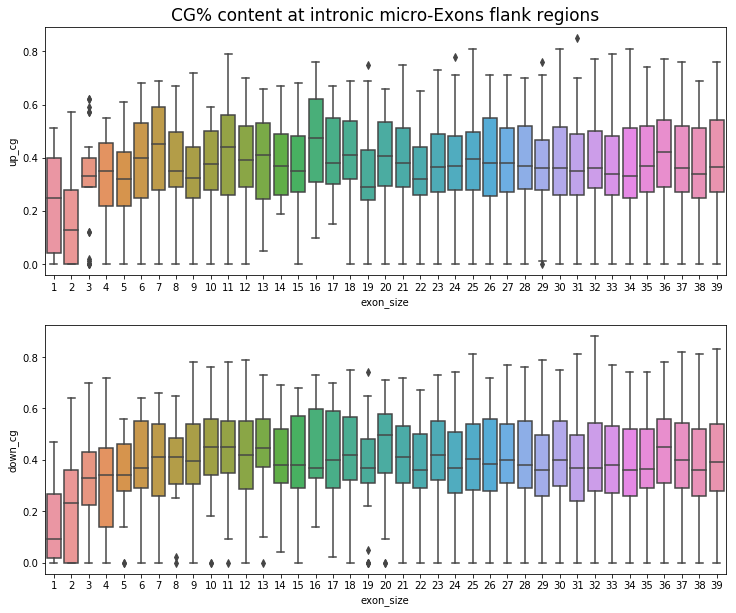

In [14]:
df_cg_content = df.query('type==1')
print df_cg_content.shape
df_cg_content.head()
plt.subplot(211)
plt.title('CG% content at intronic micro-Exons flank regions', fontsize=17)
sns.boxplot(x='exon_size',y='up_cg',data=df_cg_content)
plt.subplot(212)
sns.boxplot(x='exon_size',y='down_cg',data=df_cg_content)
plt.subplots_adjust(bottom=-1, right=1.7, top=0.9)

In [15]:
#df_test
print df.shape
#df_test = df.query('up_cg > 0.10  and down_cg > 0.10')
df_test = df.copy()
print df_test.shape

(177641, 9)
(177641, 9)


In [16]:
df = df_test.copy() # here a copy this filtered data to main df 

In [17]:
df['short_id'] = df[['chr', 'start', 'end']].apply(lambda x : '_'.join(map(str,[x[0], x[1], x[2]])), axis=1)

def use_conservation_in_memory(use_memory_dict=True):
    if use_memory_dict:
        print 'loading Hash conservation...'
        conser_hash = pickle.load(open('conser_hash_100.pkl'))
        return conser_hash
    else:
        print 'Conservation attribuition...'
        conser_hash = {'_'.join([k.split(':')[-1]]  + k.split(':')[1:3]) :v for k, v in get_conservation_hash(size_sequence=SIZE_SEQUENCE, flanks_regions=df).iteritems()}
        #
        #
        print 'saving a hash on a pickle format...'
        output = open('conser_hash_100.pkl', 'wb') # Maybe will be needed saving this at 'work' directory. #
        pickle.dump(conser_hash, output)
        output.close()
        print 'Saving completed...'

# Using conservation hash in memory
conser_hash = use_conservation_in_memory(use_memory_dict=True) # True 

df['conservation'] = df['short_id'].apply(lambda x: conser_hash[x] if x in conser_hash else 'NO_CONSERVATION')

print 'Conservation checking...'
df['check_conservation'] = df['conservation'].apply(lambda x: True if len(x[0]) == SIZE_SEQUENCE and len(x[1]) == SIZE_SEQUENCE else False)

print 'conservation check', len(df.query('check_conservation == True'))

for y, x in enumerate(df.query("check_conservation == True")["conservation"].values):
    #print 'n: '+ str(y)
    #print len(x[0]) + len(x[1])
    if (len(x[0]) + len(x[1])) != (SIZE_SEQUENCE*2):
        print len(x[0]), len(x[1]), 'exiting'
        exit()

df ['seq_encoded'] = df[['up_seq', 'down_seq']].apply(encode_sequences, axis=1)
df = df[df['seq_encoded'] != 0]
df = df[df['check_conservation'] == True]

df['conservation_mean']= df['conservation'].apply(lambda x: np.mean(x[0] + x[1]))
print df.query('type == 0 ')['conservation_mean'].describe()
print df.query('type == 1 ')['conservation_mean'].describe()
print df.query('type == 2 ')['conservation_mean'].describe()
print "=" * 100
me_quantidade = df[df['type'] == 1].shape[0]
print me_quantidade

conser_hash = 'empty'

loading Hash conservation...
Conservation checking...
conservation check 177514
count    172596.000000
mean          0.116075
std           0.134705
min           0.000000
25%           0.041000
50%           0.073000
75%           0.132500
max           1.000000
Name: conservation_mean, dtype: float64
count    4908.000000
mean        0.225518
std         0.236539
min         0.000000
25%         0.057000
50%         0.131500
75%         0.324625
max         1.000000
Name: conservation_mean, dtype: float64
count    10.000000
mean      0.054300
std       0.053399
min       0.002500
25%       0.005375
50%       0.037750
75%       0.101875
max       0.137000
Name: conservation_mean, dtype: float64
4908


(4908, 14)


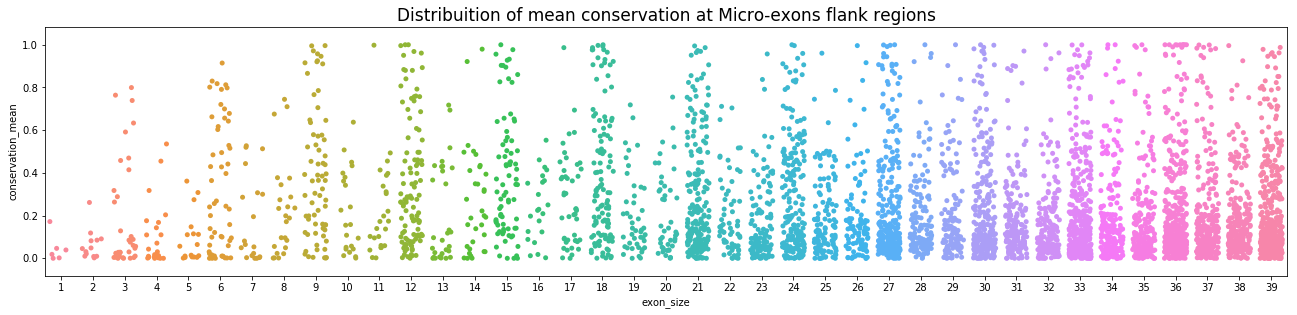

In [18]:
df_conser = df.query('type ==1')
print df_conser.shape
df_conser.head()

plt.subplot(211)
plt.title('Distribuition of mean conservation at Micro-exons flank regions', fontsize=17)
sns.stripplot(x='exon_size',y='conservation_mean',data=df_conser, jitter=0.35)
plt.subplots_adjust(bottom=-1, right=3, top=0.9)

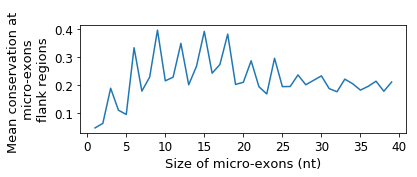

In [19]:
plt.subplot(211)
hash_plot = {}
for e, c  in zip(df_conser['exon_size'] ,df_conser['conservation_mean']):
    if e in hash_plot:
        hash_plot[e].append(c)
    else:
        hash_plot[e] = []
        hash_plot[e].append(c)
        
        
list_sizes = [i for i, v in hash_plot.iteritems()]

list_values = [np.mean(v) for i, v in hash_plot.iteritems()]

#print list_sizes
plt.plot(list_sizes, list_values)
#plt.title('Mean Conservation at Micro-exons flank regions', fontsize=15)
#sns.stripplot(x='exon_size',y='conservation_mean',data=df_conser, jitter=0.3)

plt.subplots_adjust(bottom=-1, right=1.7, top=0.9)
plt.xlabel('Size of micro-exons (nt)',fontsize=13)
plt.ylabel('Mean conservation at \n micro-exons \nflank regions',fontsize=13)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.savefig('mean_conservetaion_flank.pdf')
plt.show()

### Adding gene_id and strand

In [20]:
!ls -lh

total 1.1G
-rw-r--r-- 1 root root 762M Feb 27 22:07 Homo_sapiens.GRCh38.76.gtf
-rw-r--r-- 1 root root  15M Feb 28 14:38 Merged_100_filters_conservation_all_strands_merged_model_first_test-40-0.71.hdf5
-rw-r--r-- 1 root root 4.7K Feb 27 21:12 adabound.pyc
-rw-r--r-- 1 root root  74M Feb 27 21:17 bed_sem_processed_lucas_megs_and_nmes_100_minus_add.bed
-rw-r--r-- 1 root root 215M Feb 27 21:35 conser_hash_100.pkl
-rw-r--r-- 1 root root 6.4K Feb 27 21:36 extract_conservation.py
-rw-r--r-- 1 root root 4.3K Feb 28 14:54 extract_conservation.pyc
-rw-r--r-- 1 root root 2.0M Feb 28 14:55 github_microexons.ipynb
-rw-r--r-- 1 root root  13K Feb 28 14:56 mean_conservetaion_flank.pdf
drwxr-xr-x 3 root root 4.0K Feb 28 14:55 microexon_predictor
drwxr-xr-x 2 root root 4.0K Feb 27 22:02 saved_sep_models
-rw-r--r-- 1 root root 864K Feb 27 22:08 tahira_output_microexons_and_long_exon_training_and_validation.tab
-rw-r--r-- 1 root root  167 Feb 28 14:33 teste_model.py


In [21]:
df_microexons_vinicius_table = pd.read_csv('Homo_sapiens.GRCh38.76.gtf',skiprows=5, header=None,sep='\t')
df_microexons_vinicius_table['gene_name'] = df_microexons_vinicius_table[8].apply(lambda x : re.search('gene_name "(\S+)"',x).group(1))
info_df_hash = {'_'.join([str(d[0]), str(d[3]-1), str(d[4])]) :d for d in df_microexons_vinicius_table.values if d[2]=='exon'}
df['strand']=[info_df_hash[i][6] for i in df.apply(lambda x: '_'.join(map(str, x.values[:3])),axis=1)]
df['gene_name']=[info_df_hash[i][-1] for i in df.apply(lambda x: '_'.join(map(str, x.values[:3])),axis=1)]


/root/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Genes with micro-exons

# Deep Learning Model (CNN)

## Train

In [22]:

def train(valores,
          classes,
          conservation,
          v_teste,
          c_teste,
          t_conservation,
          score=False, train=True, weigth_file=None):
    
    model_up_input = Input(shape=(SIZE_SEQUENCE, 4 ))
    model_up = Convolution1D(20, 8, activation='relu') (model_up_input)
    #model_up = BatchNormalization()(model_up)
    model_up = Convolution1D(40, 4, activation='relu') (model_up)
    #model_up = BatchNormalization()(model_up)
    model_up = Convolution1D(100, 2, activation='relu') (model_up)
    #model_up = BatchNormalization()(model_up)
    model_up_flat = Flatten()(model_up)
    
    
    model_up_conservation_input = Input(shape=(SIZE_SEQUENCE, 1))
    model_up_conservation = Convolution1D(20, 8, activation='relu') (model_up_conservation_input)
    model_up_conservation = Convolution1D(40, 4, activation='relu') (model_up_conservation)
    #model_up_conservation = BatchNormalization()(model_up_conservation)
    model_up_conservation = Convolution1D(100, 2, activation='relu') (model_up_conservation)
    #model_up_conservation = BatchNormalization() (model_up_conservation)
    model_up_conservation_flat  = Flatten()(model_up_conservation)
    
    model_down_input = Input(shape=(SIZE_SEQUENCE, 4))
    model_down = Convolution1D(20, 8, activation='relu' ) (model_down_input)
    #model_down = BatchNormalization() (model_down)
    model_down = Convolution1D(40, 4, activation='relu') (model_down)
    #model_down = BatchNormalization() (model_down)
    model_down = Convolution1D(100, 2, activation='relu') (model_down)
    #model_down = BatchNormalization() (model_down)
    model_down_flat = Flatten()(model_down)
    
    
    model_down_conservation_input = Input(shape=(SIZE_SEQUENCE, 1))
    model_down_conservation = Convolution1D(20, 8, activation='relu') (model_down_conservation_input)
    model_down_conservation = Convolution1D(40, 4, activation='relu') (model_down_conservation)
    #model_down_conservation= BatchNormalization()(model_down_conservation)
    model_down_conservation = Convolution1D(100, 2, activation='relu') (model_down_conservation)
    #model_down_conservation = BatchNormalization()(model_down_conservation)

    model_down_conservation_flat  = Flatten()(model_down_conservation)
    
    merge_final = concatenate([model_up_flat, model_up_conservation_flat, model_down_flat, model_down_conservation_flat  ])

    
    hidden1 = Dense(50, activation='relu', kernel_regularizer=l2(0.01))(merge_final)
    #hidden1 = Dropout(0.1)(hidden1)
    hidden2 = Dense(50, activation='relu', kernel_regularizer=l2(0.01))(hidden1)
    #hidden2 = Dropout(0.2)(hidden2)
    output = Dense(1, activation='sigmoid')(hidden2)
    merged_model = Model(inputs=[model_up_input,
                          model_up_conservation_input,
                          model_down_input,
                          model_down_conservation_input], outputs=[output])
    
    

    
    filepath="saved_sep_models/Merged_100_filters_conservation_all_strands_merged_model_first_test-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath,
                                 monitor='val_acc',
                                 verbose=1,
                                 save_best_only=True,
                                 mode='max')
    
    
    if score:
        merged_model = load_model(weigth_file)
    adam = keras.optimizers.Adam(lr=0.0001)
    sgd = SGD(lr=0.4, decay=1e-10, momentum=0.9, nesterov=True)
    
    if not score:
        merged_model.compile(loss='binary_crossentropy',
                             optimizer='rmsprop',
                             metrics=['accuracy'])
        
        print 'Model compiled'
    
    conser_up_teste = np.array([v for v_u in t_conservation for v in v_u[0]])
    conser_up_teste = conser_up_teste.reshape(len(conser_up_teste)/SIZE_SEQUENCE, SIZE_SEQUENCE, 1)
    conser_down_teste = np.array([v for v_u in t_conservation for v in v_u[1]])
    conser_down_teste = conser_down_teste.reshape(len(conser_down_teste)/SIZE_SEQUENCE, SIZE_SEQUENCE, 1)


    
    conser_up = np.array([v for v_u in conservation for v in v_u[0]])
    conser_up = conser_up.reshape(len(conser_up)/SIZE_SEQUENCE, SIZE_SEQUENCE, 1)
    conser_down = np.array([v for v_u in conservation for v in v_u[1]])
    conser_down = conser_down.reshape(len(conser_down)/SIZE_SEQUENCE, SIZE_SEQUENCE, 1)

    
    
    
    
    
    
    
    
    
    
    if score: 
        scores = merged_model.evaluate(
                [
                    np.array([v_up[:SIZE_SEQUENCE] for v_up in v_teste]),
                    conser_up_teste,
                    np.array([v_down[SIZE_SEQUENCE:] for v_down in v_teste])
                    ,conser_down_teste
                ],

                    [c_ts for c_ts in c_teste],
       
                verbose=0)
        print (c_teste.shape, 'len test_dataset')
        print("%s: %.2f%%" % (merged_model.metrics_names[1], scores[1] * 100))
        
        
        
        
        
        
        

        prob_test = merged_model.predict(
            
                [ np.array([v_up[:SIZE_SEQUENCE] for v_up in v_teste]),
                 conser_up_teste,
                 np.array([v_down[SIZE_SEQUENCE:] for v_down in v_teste]),
                 conser_down_teste]
                                         )

        generate_results([c_ts for c_ts in c_teste],
                         prob_test)
    
    # #
    # print 'Pegando os primeiros 2000 microexons para criar os motivos'           ####


    # for classe in [1,0]:
    #
    #    get_map(model=merged_model, samples=[v for v, c in zip(valores, classes) if c == classe][:3000] , size_filter=filter_first_layer_size, classe=classe)
    #
    # exit()

    
    

    if train:
        merged_model.fit([
                                np.array([ v_u[:SIZE_SEQUENCE]  for v_u in valores]),
                                conser_up,
                                np.array([ v_d[SIZE_SEQUENCE:]  for v_d in valores]),
                                conser_down
                        ],

                        [c for c in classes],
                        epochs=4000,
                       validation_split=0.20, 
                 batch_size=500,callbacks=[ checkpoint ]
                        )

    
    #callbacks=[remote, checkpoint]



### Creating Training and Test set

In [23]:
valores, grupos, conservation, t_valores, t_grupos, t_conservation, coords_id, t_coords_id = create_groups(df, me_quantidade)

(177514, 16)
4908
  chr      start        end  \
0  19   48796936   48797022   
1  15   36950323   36950400   
2  19   49711808   49711961   
3   X  119545462  119545504   
4  15   28212444   28212583   

                                              up_seq  \
0  TGTCCGGGGTCCCTAAGACCCTACCCCCTTCCCCCACCGAGAATTC...   
1  GGTATCTGATTTCTTTAGTGGTTGCCACCAAAATAAGAATCTTCAT...   
2  cagggatgtggcaaactcagttgaggccagatgtgCCGCAGGCCCA...   
3  TTTGAAAACTTTCCCGGAGAATCGCAAACTTCTTTACCCTATCATT...   
4  ACACCGTAAAGTCCTAATTCGGGTACCAAAACTACTGAAAGTCTTG...   

                                            down_seq  type  exon_size  up_cg  \
0  ACTCCTGTACCGTAGAAGACCACTACCCGCGGTACACGGTCCCCGG...     0         86   0.61   
1  ACTCACTGGGTTTTTAGTTACAGAAAGAGGGTACCGATTTTACTCT...     0         77   0.31   
2  TTGGGGCACAGGGAAAGGGTTAGAGAGGGAAGTGGGAGACCATGGA...     0        153   0.40   
3  ATTCATAATTGTTACACCCAAAGAGGTTCGTATCCGTTCATCTCCG...     0         42   0.33   
4  AGTCATGTACCACGAAGAACTACTTTATCGACGGCAGAATTTGAGC...     0

In [24]:
df = df.query('type != 2')
df['type'] =df['type'].apply(lambda x: 'microexon' if x ==1 else 'long_exon')
df['index_id'] = df.index.tolist()

In [25]:
training_validation_set = set(valores.index.tolist() + t_valores.index.tolist())
df_to_tahira = df[df['index_id'].apply(lambda x : True if x in training_validation_set else False)].copy()
del df_to_tahira['up_seq']
del df_to_tahira['down_seq']
del df_to_tahira['conservation']
del df_to_tahira['seq_encoded']
del df_to_tahira['index_id']

In [26]:
id_strand_hash = dict(zip(df_to_tahira.short_id.values, df_to_tahira.strand.values ))

In [27]:
df_to_tahira.to_csv('tahira_output_microexons_and_long_exon_training_and_validation.tab', sep='\t', index=None)

## Use this cell to run the model

In [ ]:
train(valores,
      grupos,
      conservation,
      t_valores,
      t_grupos,
      t_conservation)


## Analyzing  roc curve

In [71]:
models_files = !find  | grep hdf5 | grep 40-0.71
models_files

['./Merged_100_filters_conservation_all_strands_merged_model_first_test-40-0.71.hdf5']

In [ ]:
for f in models_files:
    print (f) 
    w= f

    train(valores,
          grupos,
          conservation,
          t_valores,
          t_grupos,
          t_conservation, train=False, score=True, weigth_file=w)

## Loading model

In [28]:
from keras.models import load_model
model_merged = load_model('Merged_100_filters_conservation_all_strands_merged_model_first_test-40-0.71.hdf5')
print 'model working'
#model_merged.predic

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

model working


## Removing conservation and checking predictions on those training microexons 


In [34]:

import copy

results_table = []


for s, c, con in tqdm(zip(t_valores[:], t_grupos[:], t_conservation[:])):
#for s, c, con in tqdm(zip(valores[:], grupos[:], conservation[:])):
    if c == 1 :

        changes = []
        #print np.array([con[0]])
        
        #print (np.array([s[:100]]))
        print np.array([s[:100]]).shape
        print np.array([s[:100]]).shape
        
        
        proba_normal = model_merged.predict([np.array([s[:100]]),
                                                   np.array([[i] for i in con[0]]).reshape(1,100,1),
                                                   np.array([s[100:]]),
                                                   np.array([[i] for i in con[1]]).reshape(1,100,1)
                                                  ], verbose=0)

        pass
        #print (proba_normal, 'Predict')
        m_seq = s[:]
        m_class = c
        #print con
        #print 'Predictiion:', proba_normal, 'Class real: ', c
        for seq_side in [0, 1]: # up and down stream
            for p, position_decrease_conservation in enumerate(con[0]):
                m_conservation =  copy.deepcopy(con)
                m_conservation[seq_side][p] = 0
                #print m_conservation[seq_side][p]  , con[seq_side][p] 

                proba_modif = model_merged.predict([np.array([s[:100]]),
                                                   np.array([[i] for i in m_conservation[0]]).reshape(1,100,1),
                                                   np.array([s[100:]]),
                                                   np.array([[i] for i in m_conservation[1]]).reshape(1,100,1)
                                                  ], verbose=0)

                if abs(proba_normal-proba_modif) != 0 :
                    #print proba_normal, proba_modif, abs(proba_normal-proba_modif)
                    #print float(proba_normal-proba_modif)
                    changes.append(np.log2(float(proba_normal/proba_modif)) )
                else:
                    changes.append(0.0)
        results_table.append(changes)    

  0%|          | 0/982 [00:00<?, ?it/s]

(1, 100, 4)
(1, 100, 4)


  0%|          | 0/982 [00:02<?, ?it/s]


KeyboardInterrupt: 

##   micro-exon heatmap after change the conservation

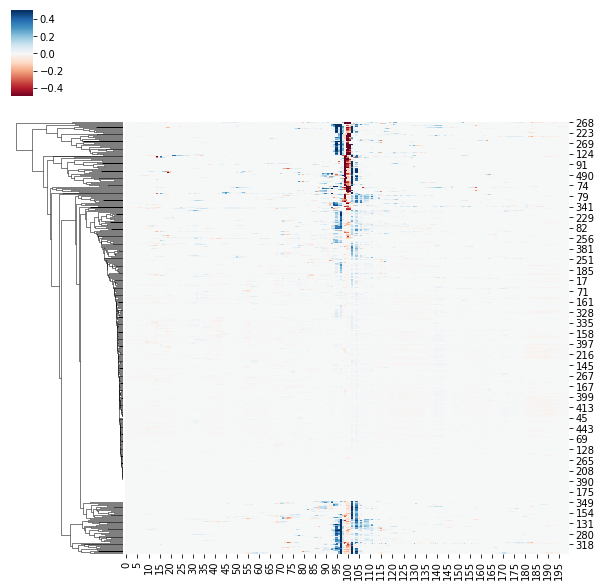

In [48]:
sns.clustermap(np.nan_to_num(np.array(results_table)), col_cluster=False, cmap='RdBu', center=0, vmax= 0.5 , vmin= -0.5)

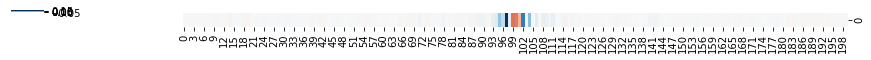

In [49]:

sns.clustermap([np.array(results_table).mean(0)],row_cluster=False, col_cluster=False, figsize=(15,0.3) , cmap='RdBu', center=0)
#np.array(results_table).mean(0)

## Mutating bases and checking predictions on those training microexons 


In [ ]:
#t_valores, t_grupos, t_conservation, 
array_teste = ''
import copy

mutation_table_results = []
bases = [ [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0] ]
#n_samples = 500
#for s, c, con in zip(t_valores[:n_samples], t_grupos[:n_samples], t_conservation[:n_samples]):
for s, c, con, id_m in tqdm(zip(valores[:], grupos[:], conservation[:] , coords_id[0].values.tolist())):
    

    #print id_m
    changes = []
    #print np.array([con[0]])
    proba_normal = model_merged.predict([np.array([s[:100]]),
                                               np.array([[i] for i in con[0]]).reshape(1,100,1),
                                               np.array([s[100:]]),
                                               np.array([[i] for i in con[1]]).reshape(1,100,1)
                                              ], verbose=0)



    m_seq = s[:]
    m_class = c
    #print con
    #print 'Predictiion:', proba_normal, 'Class real: ', c
    # up and down stream
    for p, position_mutate_bases in enumerate(s):

        bases_muted = []
        for b_mut in bases:
            m_mutation =  copy.deepcopy(s)
            m_mutation[p] =b_mut
            #print p ,b_mut
            #print m_conservation[seq_side][p]  , con[seq_side][p] 

            proba_modif = model_merged.predict([np.array([m_mutation[:100]]),
                                               np.array([[i] for i in con[0]]).reshape(1,100,1),
                                               np.array([m_mutation[100:]]),
                                               np.array([[i] for i in con[1]]).reshape(1,100,1)
                                              ], verbose=0)



            bases_muted.append(float(proba_modif-proba_normal))
        changes.append(bases_muted)
    #print changes
    #create bed using the most important changes

    chr_m, start_m, end_m = id_m.split('_')
    start_m = int(start_m)
    end_m = int(end_m)

#         sns.clustermap(np.array(changes).T, cmap="seismic",col_cluster=False, row_cluster=False ,figsize=(20, 1) ,yticklabels=['A','C', 'T', 'G'], vmin=-0.1, vmax=0.0 , center=0)
#         plt.show()
    mutation_table_results.append(changes)    




  0%|          | 0/8834 [00:00<?, ?it/s]


  0%|          | 1/8834 [00:03<7:35:22,  3.09s/it]


  0%|          | 2/8834 [00:06<7:31:33,  3.07s/it]


  0%|          | 3/8834 [00:09<7:27:18,  3.04s/it]


  0%|          | 4/8834 [00:12<7:27:42,  3.04s/it]


  0%|          | 5/8834 [00:15<7:31:31,  3.07s/it]


  0%|          | 6/8834 [00:18<7:33:26,  3.08s/it]


  0%|          | 7/8834 [00:21<7:34:08,  3.09s/it]


  0%|          | 8/8834 [00:24<7:34:48,  3.09s/it]


  0%|          | 9/8834 [00:27<7:34:24,  3.09s/it]


  0%|          | 10/8834 [00:30<7:33:45,  3.09s/it]


  0%|          | 11/8834 [00:33<7:32:55,  3.08s/it]


  0%|          | 12/8834 [00:36<7:33:04,  3.08s/it]


  0%|          | 13/8834 [00:40<7:32:25,  3.08s/it]


  0%|          | 14/8834 [00:43<7:31:57,  3.07s/it]


  0%|          | 15/8834 [00:46<7:31:41,  3.07s/it]


  0%|          | 16/8834 [00:49<7:31:27,  3.07s/it]


  0%|          | 17/8834 [00:52<7:31:16,  3.07s/it]


  0%|          | 18/8834 [00:55<7:30:51,  3.0

In [72]:
import sys
sys.setrecursionlimit(10000)

In [167]:
df_mutation_table = pd.DataFrame(mutation_table_results)

NameError: name 'mutation_table_results' is not defined

In [168]:
#df_mutation_table.to_pickle('all_df_mutation_picke.pk')

In [51]:
df_mut = pd.read_pickle('all_df_mutation_picke.pk')

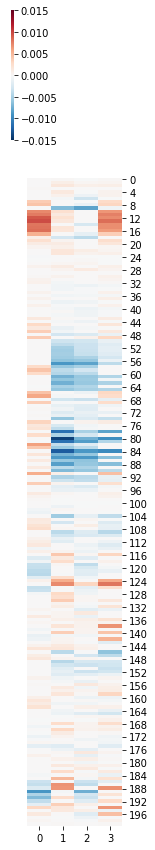

In [126]:
sns.clustermap(df_mut.iloc[7143].values.T.tolist(), figsize=[2,15], row_cluster=False, col_cluster=False, cmap='RdBu_r', vmax=0.015 , vmin=-0.015,)
plt.savefig('dmd2_heatmap.png')

In [125]:
#!grep  'DMD' -n syntethic_mutation_with_names.tab| grep '31126641' 

In [78]:
heat_map_mutations = pd.DataFrame([[ np.mean(m) for m in seq] for seq in tqdm(df_mut.values)])

100%|██████████| 8834/8834 [00:40<00:00, 216.48it/s]


In [85]:
#coords_id[0].values.tolist()

In [86]:
#grupos[:].head(10)

In [87]:
#coords_id[0].str.split('_', expand=True)[2].astype(int) - coords_id[0].str.split('_', expand=True)[1].astype(int)

In [88]:
heat_map_mutations['groups'] =  grupos[:].apply(lambda x : 'microexon' if x ==1 else 'longexon').values



dict_gene_names = dict(zip(df['short_id'].values, df['gene_name'].values))
dict_short_id =  dict(zip(df['gene_name'].values, df['short_id'].values))
heat_map_mutations['gene_name'] = [dict_gene_names[g] for g in coords_id[0].values.tolist()]
heat_map_mutations['short_id'] =  coords_id[0].values.tolist()
heat_map_mutations.to_csv('syntethic_mutation_with_names.tab', index=None, sep='\t')

del heat_map_mutations['gene_name']
del heat_map_mutations['short_id']

In [83]:
# df_remove_tahirateste = pd.read_csv('syntethic_mutation_with_names.tab', sep='\t')


# df_remove_tahirateste_calc = df_remove_tahirateste['short_id'].str.split('_', expand=True)
# df_remove_tahirateste_calc[2].astype(int) - df_remove_tahirateste_calc[1].astype(int)

In [89]:

heat_map_mutations['coord'] =  coords_id[0].values.tolist()


dict_gene_names = dict(zip(df['short_id'].values, df['gene_name'].values))

heat_map_mutations['gene'] = heat_map_mutations['coord'].apply(lambda x: dict_gene_names[x])
heat_map_mutations['chr'] =  ['chr'  +  str(x.split('_')[0]) for x in heat_map_mutations['coord']]
heat_map_mutations['start'] =  [ x.split('_')[1] for x in heat_map_mutations['coord']]
heat_map_mutations['end'] =  [ x.split('_')[2] for x in heat_map_mutations['coord']]

heat_map_mutations.to_csv('syn_with_coor_information.txt', sep='\t', index=None)

I will try check how many mutation exist in the flanks of the genes that comprised the top 5 percent. 
    - I need to capture only the 5 % unique regions  
    
    
    


,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,groups,coord,gene,chr,start,end
0,1.260862e-04,1.400843e-03,-7.954240e-03,-0.009842,0.004965,-0.010337,-0.014379,-0.012893,-0.013611,0.010407,...,4.654191e-03,-0.002654,2.186365e-03,-0.000039,microexon,17_40478306_40478333,TNS4,chr17,40478306,40478333
1,3.375858e-04,-4.229695e-04,-1.444355e-03,0.002397,-0.001761,-0.001746,-0.002175,-0.003437,0.003752,-0.005182,...,1.059622e-04,0.000077,3.311038e-05,0.000000,microexon,19_37323532_37323570,HKR1,chr19,37323532,37323570
2,-6.369948e-04,1.377374e-03,-4.350796e-03,0.003725,-0.004535,-0.010735,0.005877,-0.010326,-0.013321,-0.007468,...,-2.036169e-03,-0.001096,-3.568828e-05,0.000289,microexon,12_131906891_131906924,ULK1,chr12,131906891,131906924
3,-2.980232e-06,1.471341e-04,-2.094656e-04,0.001373,-0.000264,-0.000082,0.001133,-0.000501,0.001785,0.002350,...,-6.623268e-04,0.000220,3.930926e-05,0.000323,microexon,1_53218171_53218203,C1orf123,chr1,53218171,53218203
4,2.741814e-06,1.183249e-03,2.620809e-03,0.006730,0.005998,-0.003250,-0.004503,0.004275,-0.001285,-0.004296,...,-1.093246e-02,-0.010447,1.176625e-03,0.000143,longexon,X_101486022_101486092,ARMCX4,chrX,101486022,101486092
5,-6.255507e-05,3.156215e-04,4.134625e-04,-0.001517,-0.001605,0.001361,-0.000706,-0.001452,-0.001685,-0.002201,...,-7.716268e-04,0.000297,-9.766221e-05,-0.000136,microexon,9_128609650_128609665,SPTAN1,chr9,128609650,128609665
6,8.147955e-05,4.686713e-04,-6.979257e-04,-0.000864,0.001182,-0.001289,-0.001456,0.002411,-0.002652,-0.002543,...,9.880960e-05,0.000030,-4.060566e-05,-0.000041,microexon,3_49861438_49861448,CAMKV,chr3,49861438,49861448
7,3.783405e-05,-1.606047e-04,3.629923e-05,0.000063,-0.001186,-0.001017,-0.001165,-0.000729,0.004068,-0.003155,...,-5.725026e-04,-0.001418,1.211062e-03,0.000517,microexon,1_156957791_156957815,ARHGEF11,chr1,156957791,156957815
8,3.975183e-04,2.461709e-03,-7.231705e-03,0.003768,0.012924,-0.007416,-0.012554,0.012550,0.012435,0.016224,...,2.737492e-03,0.002497,9.716526e-04,0.000005,longexon,3_81646391_81646504,GBE1,chr3,81646391,81646504
9,1.358271e-03,3.823489e-04,5.159117e-03,0.005322,0.006205,0.001623,0.009234,-0.002029,-0.002982,-0.000424,...,-6.860346e-04,0.000774,7.661283e-04,0.000589,longexon,15_75917229_75917394,FBXO22,chr15,75917229,75917394


-27

In [233]:
del heat_map_mutations['chr']  
del heat_map_mutations['start']  
del heat_map_mutations['end']  
del heat_map_mutations['coord'] 

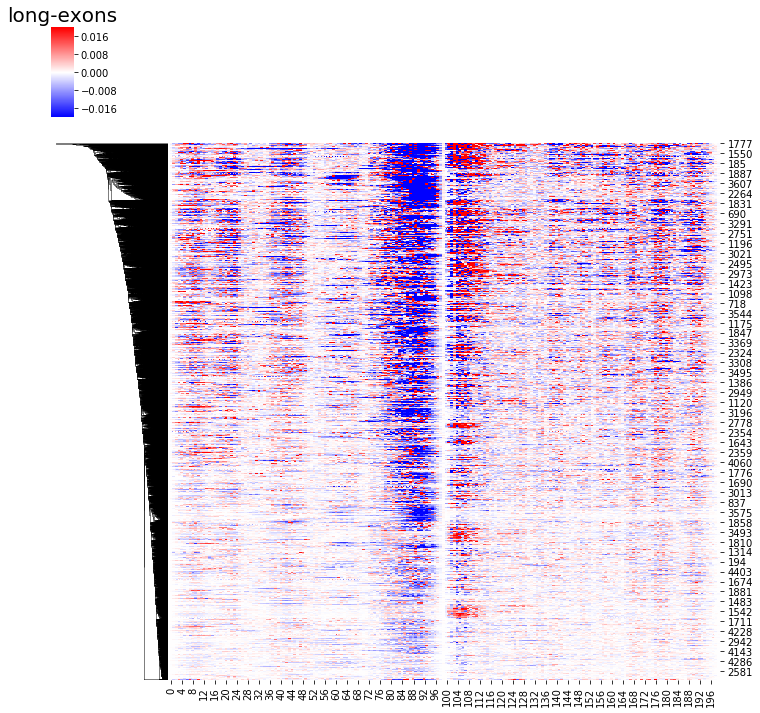

In [174]:


sns.clustermap(heat_map_mutations.query('groups == "longexon" ')[heat_map_mutations.columns.values[:-1]].values,
               cmap="bwr",
               col_cluster=False,
               row_cluster=True,
               figsize=(12, 12),
                center=0,
              vmin=-0.02,
               vmax= 0.02, )
plt.title('long-exons', fontsize=20)

plt.savefig('long_exons_mutations.png')

(-0.02, 0.02)

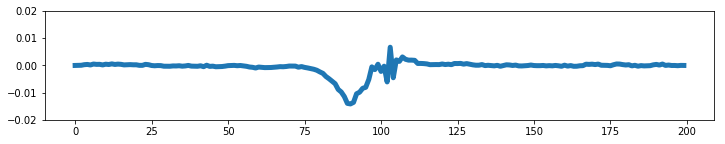

In [175]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 2

plt.plot(heat_map_mutations.query('groups == "longexon" ').mean(), lw= 5)
plt.ylim(-0.02, 0.02)


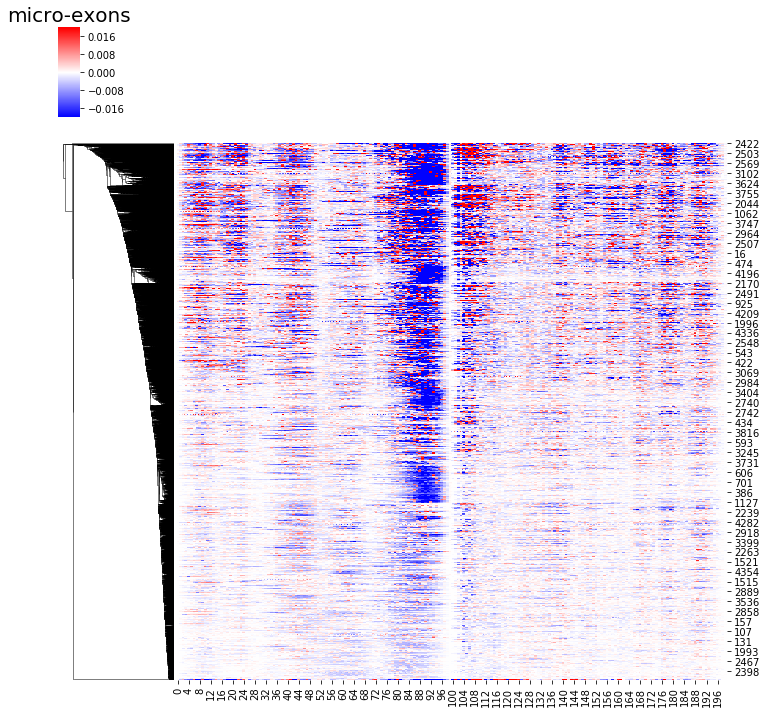

In [176]:
import sys
sys.setrecursionlimit(10000)

sns.clustermap(heat_map_mutations.query('groups == "microexon" ')[heat_map_mutations.columns.values[:-1]].values,
               cmap="bwr",
               col_cluster=False,
               row_cluster=True,
               figsize=(12, 12),
                center=0,
              vmin=-0.02,
               vmax= 0.02)

plt.title('micro-exons', fontsize=20)
plt.savefig('micro_exons_mutations.png')

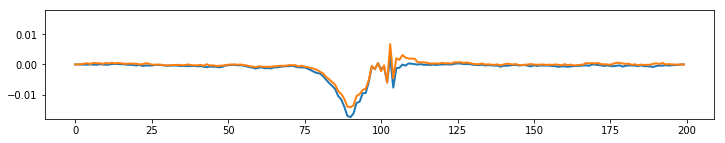

In [177]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 2

plt.plot(heat_map_mutations.query('groups == "microexon" ').mean(), lw= 2)
plt.plot(heat_map_mutations.query('groups == "longexon" ').mean(), lw= 2)
plt.ylim(-0.018, 0.018)
plt.savefig('heatmap_mix_exon_longexon.png')

In [178]:
heat_map_mutations = heat_map_mutations.sort_values('groups')

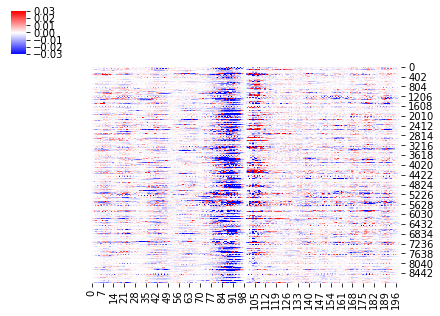

In [179]:

sns.clustermap(heat_map_mutations[heat_map_mutations.columns.values[:-1]].values,
               cmap="bwr",
               col_cluster=False,
               row_cluster=False,
               figsize=(7, 5),
                center=0,
              vmin=-0.03,
               vmax= 0.03 )

## Tomorrow

    - separate exons and microexons given the label sotred in __ grupos[:]__

# PositionScore mutation

100%|██████████| 8834/8834 [00:30<00:00, 292.45it/s]


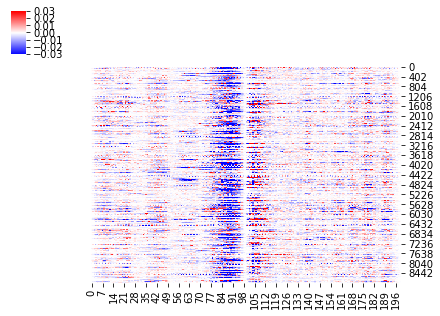

In [180]:
sns.clustermap([ [ np.mean(m) for m in seq] for seq in tqdm(df_mut.values)],
               cmap="bwr",
               col_cluster=False,
               row_cluster=False,
               figsize=(7, 5),
               vmin=-0.03,
               vmax= 0.03 , center=0)
#         plt.show()

In [181]:
len(coords_id[0].values.tolist())

8834

In [161]:
df_mut['groups'] = grupos[:].apply(lambda x : 'microexon' if x ==1 else 'longexon').values

df_mut = df_mut[df_mut['groups'] == 'microexon']
del df_mut['groups']

coords_to_mutation_table = []
for  c,  id_m in zip( grupos[:] , coords_id[0].values.tolist()):
    
    if c == 1 :
        chr_m, start_m, end_m = id_m.split('_')
        start_m = int(start_m)
        end_m = int(end_m)
        coords_to_mutation_table.append([[chr_m, end_m, end_m+100, 'right'], [chr_m, start_m-100, start_m, 'left']])

In [162]:
df_mut['left'] = ['_'.join(map(str,x[1])) for x in coords_to_mutation_table]
df_mut['right'] = ['_'.join(map(str,x[0])) for x in coords_to_mutation_table]


In [164]:
prediction_changes = []
for base in df_mut.values.tolist():
    result = [ [n, np.mean(x), base[-2], base[-1]] for n, x in  enumerate(base[:-2]) if np.mean(x) <0]
    if len(result) > 0:
        for r in result:
            prediction_changes.append(r)
    

,0,1,2,3
0,2,-0.007954,17_40478206_40478306_left,17_40478333_40478433_right
1,3,-0.009842,17_40478206_40478306_left,17_40478333_40478433_right
2,5,-0.010337,17_40478206_40478306_left,17_40478333_40478433_right
3,6,-0.014379,17_40478206_40478306_left,17_40478333_40478433_right
4,7,-0.012893,17_40478206_40478306_left,17_40478333_40478433_right
5,8,-0.013611,17_40478206_40478306_left,17_40478333_40478433_right
6,10,-0.015289,17_40478206_40478306_left,17_40478333_40478433_right
7,11,-0.012151,17_40478206_40478306_left,17_40478333_40478433_right
8,12,-0.008337,17_40478206_40478306_left,17_40478333_40478433_right
9,13,-0.005142,17_40478206_40478306_left,17_40478333_40478433_right


In [365]:
df_prediction_delta_to_filter = pd.DataFrame(prediction_changes)
df_prediction_delta_to_filter.columns = 'mutation_base delta left right'.split(' ')

In [366]:
df_prediction_delta_to_filter = df_prediction_delta_to_filter.sort_values('delta', ascending=False)

In [367]:
place_to_cut = df_prediction_delta_to_filter['delta'].shape[0] - int(df_prediction_delta_to_filter['delta'].shape[0] * 0.25)


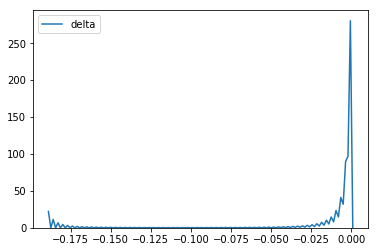

In [369]:
sns.kdeplot(df_prediction_delta_to_filter['delta'])

In [370]:


df_prediction_delta = df_prediction_delta_to_filter.tail(place_to_cut)


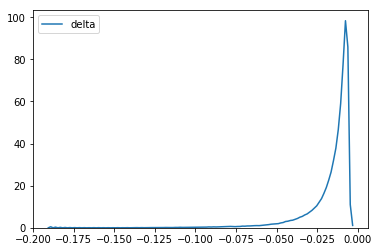

In [371]:
sns.kdeplot(df_prediction_delta['delta'])

## cutt_off values

In [372]:
df_prediction_delta['delta'].iloc[0]

-0.005715310573577881

In [373]:
def convert_mutation_to_base(b):
    if b['strand'] == '-':  # correcting by strand
        b['mutation_base']  = 200 - b['mutation_base'] 
        
        
        
    if b['mutation_base'] >99:
        coords    = b['right'].split('_')
        coords[1] = int(coords[1])
        b_mut = b['mutation_base'] -100
        return '_'.join( map(str,[coords[0], coords[1] + b_mut , coords[1] + b_mut +1]))
    else:
        coords    = b['left'].split('_')
        coords[1] = int(coords[1])
        return  '_'.join( map( str,[coords[0], coords[1]+ b['mutation_base'] , coords[1]+b['mutation_base']+1]))
    

In [374]:
df_prediction_delta['microexon_len'] = df_prediction_delta.apply(lambda x : int(x['right'].split('_')[1]) - int(x['left'].split('_')[2]) , axis=1 )
df_prediction_delta['microexon_start_unstranded'] = df_prediction_delta.apply(lambda x :  int(x['left'].split('_')[2]), axis=1 )
df_prediction_delta['microexon_end_unstranded'] = df_prediction_delta.apply(lambda x :    int(x['right'].split('_')[1]), axis=1 )
df_prediction_delta['microexon_chr_unstranded'] = df_prediction_delta.apply(lambda x :    str(x['right'].split('_')[0]), axis=1 )

/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [375]:
df['new_id'] = df.apply(lambda x : "{}_{}_{}".format(x.chr, x.start,x.end), axis=1)


In [376]:
df_prediction_delta['id'] =  df_prediction_delta.apply(lambda x : "{}_{}_{}".format(x.microexon_chr_unstranded, x.microexon_start_unstranded, x.microexon_end_unstranded), axis=1)

/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [377]:
df_prediction_delta['strand'] = df_prediction_delta['id'].apply(lambda x: id_strand_hash[x])
df_prediction_delta['exact_coord'] = df_prediction_delta.apply(lambda x : convert_mutation_to_base(x), axis=1)

/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [378]:

df_prediction_delta['chr_mutation'] = [x.split('_')[0] for x in df_prediction_delta['exact_coord']]
df_prediction_delta['start_mutation'] = [x.split('_')[1] for x in df_prediction_delta['exact_coord']]
df_prediction_delta['end_mutation'] = [x.split('_')[2] for x in df_prediction_delta['exact_coord']]

/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [379]:
set_gene_name = dict(zip(df['new_id'].values, df['gene_name'].values))
df_prediction_delta['gene_name'] = df_prediction_delta['id'].apply(lambda x : set_gene_name[x] )

/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [380]:
#136980855 + 93

In [381]:
#((200-104)-100)  + 49791468

In [357]:
#

In [358]:
#df_prediction_delta

In [382]:


df_prediction_delta['delta'] = df_prediction_delta['delta'] * -1
df_prediction_delta = df_prediction_delta.sort_values('delta', ascending=False)
del df_prediction_delta['microexon_chr_unstranded']
df_prediction_delta.to_csv('top_25_percent_mutation_flank_microexon.out', sep='\t', index=None)

/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [361]:
df_prediction_delta.head()

,mutation_base,delta,left,right,microexon_len,microexon_start_unstranded,microexon_end_unstranded,id,strand,exact_coord,chr_mutation,start_mutation,end_mutation,gene_name
141359,193,-0.022369,9_136980732_136980832_left,9_136980855_136980955_right,23,136980832,136980855,9_136980832_136980855,+,9_136980948_136980949,9,136980948,136980949,PTGDS
103080,77,-0.022369,4_67681462_67681562_left,4_67681591_67681691_right,29,67681562,67681591,4_67681562_67681591,-,4_67681614_67681615,4,67681614,67681615,UBA6
49853,33,-0.022370,2_219179632_219179732_left,2_219179763_219179863_right,31,219179732,219179763,2_219179732_219179763,+,2_219179665_219179666,2,219179665,219179666,FAM134A
189828,80,-0.022370,18_74256729_74256829_left,18_74256853_74256953_right,24,74256829,74256853,18_74256829_74256853,-,18_74256873_74256874,18,74256873,74256874,CYB5A
2224,43,-0.022370,11_103241426_103241526_left,11_103241547_103241647_right,21,103241526,103241547,11_103241526_103241547,+,11_103241469_103241470,11,103241469,103241470,DYNC2H1


In [264]:

pd.DataFrame([x.split('_') for x in df_prediction_delta['exact_coord']]).to_csv('base_mutation.bed', header=None, index=None, sep='\t')

In [265]:

df_chr_base_mutation = pd.read_csv('base_mutation.bed', header=None, sep='\t')
df_chr_base_mutation[0] = 'chr' + df_chr_base_mutation[0]


df_chr_base_mutation.to_csv('chr_base_mutation.bed', header=None, index=None, sep='\t')

In [390]:
!wc 'base_mutation.bed'

   23704   71112  493850 base_mutation.bed


In [267]:
#df_prediction_delta['left'].apply(lambda x : int(x.split('_')[1] )) - df_prediction_delta['right'].apply(lambda x :   int( x.split('_')[1])  )

In [405]:
100 * (17668/2)

883400

In [403]:
#df_prediction_delta


BedTool('base_mutation.bed').intersect('microexon_coords.bed', wb=True).to_dataframe()





,chrom,start,end,name,score,strand,thickStart
0,9,136980948,136980949,9,136980855,136980955,right
1,4,67681614,67681615,4,67681591,67681691,right
2,2,219179665,219179666,2,219179632,219179732,left
3,18,74256873,74256874,18,74256853,74256953,right
4,11,103241469,103241470,11,103241426,103241526,left
5,X,19035985,19035986,X,19035977,19036077,right
6,8,65689545,65689546,8,65689465,65689565,left
7,1,85047487,85047488,1,85047474,85047574,left
8,14,39276921,39276922,14,39276833,39276933,left
9,16,31149754,31149755,16,31149731,31149831,right


In [398]:
bed_clin_var.intersect('microexon_coords.bed', wb=True).to_dataframe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,5887247,5887248,260546,.,G,A,.,not_specified,1,5887189,5887289,left
1,1,11285808,11285809,860,.,A,G,.,Schnyder_crystalline_corneal_dystrophy,1,11285732,11285832,right
2,1,11285821,11285822,864,.,C,G,.,Schnyder_crystalline_corneal_dystrophy,1,11285732,11285832,right
3,1,11960629,11960630,387326,.,C,T,.,not_specified,1,11960545,11960645,left
4,1,11963528,11963529,381979,.,C,T,.,not_specified,1,11963431,11963531,left
5,1,11989151,11989152,292370,.,G,T,.,Hereditary_motor_and_sensory_neuropathy|not_sp...,1,11989064,11989164,left
6,1,16989877,16989878,293778,.,C,T,.,Parkinson_disease_9,1,16989786,16989886,left
7,1,40091401,40091402,56191,.,A,C,.,Ceroid_lipofuscinosis_neuronal_1,1,40091399,40091499,right
8,1,40091402,40091403,130021,.,C,T,.,Ceroid_lipofuscinosis_neuronal_1|not_specified...,1,40091399,40091499,right
9,1,40091403,40091404,380711,.,G,A,.,not_specified,1,40091399,40091499,right


# This table gave me before 50 disease if this values changes it will be amazing .

In [269]:
bed_clin_var.intersect('base_mutation.bed', wb=True).to_dataframe()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,193212054,193212055,412617,.,T,C,.,Parathyroid_carcinoma,1,193212054,193212055
1,1,193212054,193212055,412629,.,T,G,.,Parathyroid_carcinoma,1,193212054,193212055
2,1,193212059,193212060,412626,.,C,T,.,Parathyroid_carcinoma,1,193212059,193212060
3,1,201372137,201372138,43651,.,C,T,.,Hypertrophic_cardiomyopathy|Left_ventricular_n...,1,201372137,201372138
4,1,201372138,201372139,43650,.,G,A,.,Left_ventricular_noncompaction_6|Familial_hype...,1,201372138,201372139
5,10,71734647,71734648,228494,.,G,T,.,not_specified,10,71734647,71734648
6,10,86692519,86692520,163841,.,C,T,.,not_specified,10,86692519,86692520
7,10,104050612,104050613,298718,.,T,G,.,"Epidermolysis_bullosa,_junctional",10,104050612,104050613
8,11,47331890,47331891,42745,.,A,C,.,Hypertrophic_cardiomyopathy|not_specified,11,47331890,47331891
9,11,47341090,47341091,188559,.,C,T,.,not_specified,11,47341090,47341091


In [392]:
df_deseases = bed_clin_var.intersect('base_mutation.bed', wb=True).to_dataframe()
df_deseases[0] = df_deseases[0].apply(lambda x : 'chr'+ str(x))


df_deseases

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,193212054,193212055,412617,.,T,C,.,Parathyroid_carcinoma,1,193212054,193212055
1,chr1,193212054,193212055,412629,.,T,G,.,Parathyroid_carcinoma,1,193212054,193212055
2,chr1,193212059,193212060,412626,.,C,T,.,Parathyroid_carcinoma,1,193212059,193212060
3,chr1,201372137,201372138,43651,.,C,T,.,Hypertrophic_cardiomyopathy|Left_ventricular_n...,1,201372137,201372138
4,chr1,201372138,201372139,43650,.,G,A,.,Left_ventricular_noncompaction_6|Familial_hype...,1,201372138,201372139
5,chr10,71734647,71734648,228494,.,G,T,.,not_specified,10,71734647,71734648
6,chr10,86692519,86692520,163841,.,C,T,.,not_specified,10,86692519,86692520
7,chr10,104050612,104050613,298718,.,T,G,.,"Epidermolysis_bullosa,_junctional",10,104050612,104050613
8,chr11,47331890,47331891,42745,.,A,C,.,Hypertrophic_cardiomyopathy|not_specified,11,47331890,47331891
9,chr11,47341090,47341091,188559,.,C,T,.,not_specified,11,47341090,47341091


In [272]:
df_deseases.to_excel('47_mutacoes.xlsx', header=None, index=None)

In [273]:
#!conda install -c anaconda openpyxl -y


In [395]:
coords = []
for id_m in coords_id[0].values.tolist():
    chr_m, start_m, end_m = id_m.split('_')
    start_m = int(start_m)
    end_m = int(end_m)
    coords.append([[chr_m, end_m, end_m+100, 'right'], [chr_m, start_m-100, start_m, 'left']])
pd.DataFrame(np.array(coords).flatten().reshape(-1,4).tolist()).to_csv('microexon_coords.bed', sep='\t', index=None, header=None)






In [275]:
df_bed_intersected = bed_clin_var.intersect('microexon_coords.bed', wb=True).to_dataframe()

In [394]:
df_bed_intersected

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,5887247,5887248,260546,.,G,A,.,not_specified,1,5887189,5887289,left
1,1,11285808,11285809,860,.,A,G,.,Schnyder_crystalline_corneal_dystrophy,1,11285732,11285832,right
2,1,11285821,11285822,864,.,C,G,.,Schnyder_crystalline_corneal_dystrophy,1,11285732,11285832,right
3,1,11960629,11960630,387326,.,C,T,.,not_specified,1,11960545,11960645,left
4,1,11963528,11963529,381979,.,C,T,.,not_specified,1,11963431,11963531,left
5,1,11989151,11989152,292370,.,G,T,.,Hereditary_motor_and_sensory_neuropathy|not_sp...,1,11989064,11989164,left
6,1,16989877,16989878,293778,.,C,T,.,Parkinson_disease_9,1,16989786,16989886,left
7,1,40091401,40091402,56191,.,A,C,.,Ceroid_lipofuscinosis_neuronal_1,1,40091399,40091499,right
8,1,40091402,40091403,130021,.,C,T,.,Ceroid_lipofuscinosis_neuronal_1|not_specified...,1,40091399,40091499,right
9,1,40091403,40091404,380711,.,G,A,.,not_specified,1,40091399,40091499,right


In [276]:
df_l_r_grouped = df_bed_intersected.groupby(12)

In [277]:
df_r = df_l_r_grouped.get_group('right')
df_l = df_l_r_grouped.get_group('left')



### Checking if variants have a differnt postiion score

In [408]:
df_to_assing_clinvar = pd.read_table('syn_with_coor_information.txt')


In [412]:
df_to_assing_clinvar.columns

Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9',
       ...
       u'196', u'197', u'198', u'199', u'groups', u'coord', u'gene', u'chr',
       u'start', u'end'],
      dtype='object', length=206)

# change strand
# select only microexon

In [415]:
def constructing_bed(x, range_x):
    
    if range_x >99:
        range_x - range_x 
        
        
    [x['chr'], x['start'], x['start']+1, x[range_x]] 
    
    
    
    
df_to_assing_clinvar.apply( lambda x : , axis=1)

0        [chr17, 40478306]
1        [chr19, 37323532]
2       [chr12, 131906891]
3         [chr1, 53218171]
4        [chrX, 101486022]
5        [chr9, 128609650]
6         [chr3, 49861438]
7        [chr1, 156957791]
8         [chr3, 81646391]
9        [chr15, 75917229]
10       [chr5, 145796441]
11       [chr20, 45840447]
12       [chr1, 212020720]
13       [chr17, 65189285]
14        [chr11, 7059893]
15       [chr4, 108817396]
16        [chr8, 39221609]
17       [chr14, 56585000]
18       [chr1, 156014960]
19       [chr14, 71109794]
20         [chr9, 8523512]
21       [chr12, 32624421]
22        [chr6, 32324655]
23        [chr8, 50590878]
24        [chr1, 43993839]
25        [chr5, 70077018]
26        [chr2, 43566697]
27       [chr3, 184352292]
28        [chr19, 7076380]
29        [chr20, 2975214]
               ...        
8804      [chr2, 84611673]
8805     [chr2, 169205478]
8806      [chr12, 6678126]
8807     [chr1, 157699691]
8808     [chr16, 28590630]
8809     [chr2, 147981927]
8

## matching mutation and scores

In [278]:
df_r['coord_label'] = df_r[[9,10,11,12]].apply(lambda x : '_'.join(map(str, x )) ,axis=1)

grouped_df_mutation = df_r.groupby('coord_label')


/Users/lxf453/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [279]:
for p in df_mut['right'].values.tolist():
    #print (p) 
    if  p in grouped_df_mutation.groups:
        print (p)

9_128609665_128609765_right
17_18130810_18130910_right
16_50775174_50775274_right
3_15479003_15479103_right
14_73654885_73654985_right
X_70023241_70023341_right
9_110762208_110762308_right
2_169016799_169016899_right
11_47347680_47347780_right
9_128600115_128600215_right
1_150488986_150489086_right
10_97752877_97752977_right
19_38922267_38922367_right
10_43111232_43111332_right
15_42403777_42403877_right
2_189104277_189104377_right
14_87982243_87982343_right
6_123260638_123260738_right
11_66511239_66511339_right
11_66688661_66688761_right
17_8229922_8230022_right
11_45917493_45917593_right
6_44306532_44306632_right
3_179420927_179421027_right
6_131872101_131872201_right
12_6333865_6333965_right
12_56003656_56003756_right
22_36327488_36327588_right
X_18510854_18510954_right
17_50277740_50277840_right
18_10801428_10801528_right
6_129475401_129475501_right
21_46126541_46126641_right
3_49132154_49132254_right
16_89799638_89799738_right
16_15798687_15798787_right
19_55032538_55032638_right


In [280]:
p

'15_43611537_43611637_right'

In [281]:
#grouped_df_mutation.groups

## Deseases more frequent mutations
(Do i need to corret by strand?)

/Users/lxf453/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lxf453/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.06)

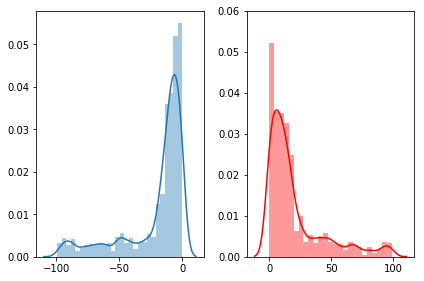

In [282]:


plt.subplot(121)
sns.distplot(df_r[10] - df_r[1])



plt.subplot(122)
sns.distplot(df_l[11] - df_l[2], color='red')
plt.tight_layout()
plt.ylim(0, 0.06)

In [ ]:
for x in bed_clin_var.intersect('microexon_coords.bed', wb=True):
    print x

## Generate a pertubation mean profile (separating with base)

In [ ]:
np.array(mutation_table_results[0]).T

In [30]:

import pyBigWig
#bw = pyBigWig.open("test/test.bw")
#bw.stats("1", 0, 3)

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/lucas/miniconda2:

The following packages will be UPDATED:

    pybigwig: 0.2.8-py27_0 bioconda --> 0.3.4-np110py27_0 bioconda

pybigwig-0.3.4 100% |################################| Time: 0:00:01  95.05 kB/s


### Download encode bw files k562

In [57]:
files_bw = !curl  "ftp.ebi.ac.uk/pub/databases/ensembl/encode/integration_data_jan2011/byDataType/signal/jan2011/bigwig/"

In [81]:

for f in files_bw:
    if '.bw' in f and '2Reps' in f:
        f = f.split('  ')
        f = f[-1]
        
        if 'K562' in f :
            
            f=  f.strip('2011 ')
            print f 
            #print re.search('K562(\S+)_',f).group(1)
        

wgEncodeBroadHistoneK562CtcfStdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H2azStdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k27acStdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k27me3StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k36me3StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k4me1StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k4me2StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k4me3StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k79me2StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k9acStdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k9me3StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H4k20me1StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562Pol2bStdAln_2Reps.norm5.rawsignal.bw
wgEncodeHaibTfbsK562Bcl3Pcr1xAln_2Reps.norm5.rawsignal.bw
wgEncodeHaibTfbsK562Bclaf1m33Pcr1xAln_2Reps.norm5.rawsignal.bw
wgEncodeHaibTfbsK562Ctcflsc98982V0416101Aln_2Reps.norm5.rawsignal

In [1]:
!ls

arquivo_processado
backups
bed100maismenos.mes.bed
bed100maismenos.nmes.bed
bed_lucas_megs_and_nmes.bed
conser_hash_100.pkl
conser_hash.pkl
encode_data
extract_conservation.py
extract_conservation.pyc
felipe_bed_extended.bed
fox_bed_extended.bed
__init__.py
__init__.pyc
IntegratedGradients.py
IntegratedGradients.pyc
last_model.hdf5
logo_temp.fa
microexon_project_3_OUT.ipynb
microexon_project.ipynb
micro_exons_treinamento.bed
micro_exons_validacao.bed
models_topology
model_used_to_paper.hdf5
motifs
mutation_api.py
nohup_epi.train
nohup.out
nohup.train
plot_long_exons.png
plot_micro_exons.png
point_prediction.ipynb
resultados
saved_models
saved_sep_models
save_epi_and_seqs_8000.p
separated_conservation_inputs_seq_cnn.py
separated_inputs_seq_cnn.py
separated_inputs_seq_cnn.py.backup
separated_sem_processed_inputs_seq_cnn.py
temp_tomtom.tab
test.bed
teste
Untitled1.ipynb
Untitled2.ipynb
Untitled Folder 1
Untitled.ipynb
wgEncodeCshlLongRnaSeqK562CellLongnonpolyaMinusRawSigRep2.bigWig
wgEnco

histones = '''wgEncodeBroadHistoneK562CtcfStdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H2azStdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k27acStdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k27me3StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k36me3StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k4me1StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k4me2StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k4me3StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k79me2StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k9acStdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H3k9me3StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562H4k20me1StdAln_2Reps.norm5.rawsignal.bw
wgEncodeBroadHistoneK562Pol2bStdAln_2Reps.norm5.rawsignal.bw
wgEncodeOpenChromDnaseK562Aln_2Reps.norm5.rawsignal.bw
wgEncodeUwTfbsK562CtcfStdAln_2Reps.norm5.rawsignal.bw'''
for h in histones.split('\n'):
    url =     'ftp.ebi.ac.uk/pub/databases/ensembl/encode/integration_data_jan2011/byDataType/signal/jan2011/bigwig/{}'.format(h) 
    !wget -P encode_data/ $url

### Create the heatmap sorted by exon lenght separating long exons and micro-exons

In [ ]:
import sys
#import better_exceptions
from keras.models import load_model
import tqdm
import numpy as np



def artificial_mutation(model_to_use_mutation, t_teste_to_mutation, t_class, t_position_check):
    bases = [ [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0] ]



    for micro_to_mutate, real_class, exon_position in tqdm(zip(t_teste_to_mutation, t_class, t_position_check)) :


        for index_p_to_m, position_to_mutate in enumerate(micro_to_mutate):
            for i_b   in  bases:

                mutating_this_seq = micro_to_mutate[:]  # copiando vetor para n modificar permanentemente
                mutating_this_seq[index_p_to_m] = i_b
                mutating_this_seq - np.array(mutating_this_seq)
                # print [v_up_m[:100] for v_up_m in mutating_this_seq]
                # print len([v_up_m[:100] for v_up_m in mutating_this_seq])


                up_to_mutate = np.array([mutating_this_seq[:100]])

                down_to_mutate = np.array([mutating_this_seq[100:]])
                #print up_to_mutate.shape


                proba = model_to_use_mutation.predict_proba([up_to_mutate, down_to_mutate], verbose=0)

                #print 'class:', model_to_use_mutation.predict_classes([up_to_mutate, down_to_mutate], verbose=0)
                #print micro_to_mutate
                if model_to_use_mutation.predict_classes([up_to_mutate, down_to_mutate], verbose=0)[0][0] == 1:
                    #print 'microexos grupo 1 '
                    if proba < 0.9:
                        print 'Classe original: ', real_class, 'base para modificar: ', index_p_to_m, 'modificacao: ', "Exon_position: ", exon_position, i_b, proba



## Capturing most  important motifs


In [3]:
#!conda install -c jjhelmus tensorflow -y

In [ ]:


x = {'both1':1, 'both2':2, 'only_x': 100 }
y = {'both1':10, 'both2': 20, 'only_y':200 }

In [ ]:
Counter(x) + Counter(y)

#### tads conservadas e microexons?

In [ ]:
 Pplt.ploy(range(1,10